# POKEMONS

Этот набор данных для Pokemon-ов, который включает в себя:
- Name: Название каждого покемона
- Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам
- Type 2: некоторые покемоны имеют двойной тип

 базовую статистику:
- Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон
- HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока
- Attack: базовый модификатор для обычных атак (например, Scratch, Punch)
- Defense: сопротивление базовому урону от обычных атак
- SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
- SP Def: сопротивление базового урона от специальных атак
- Speed: определяет, какой покемон атакует первым

так же для кажого покемона указано:

- поколение (generation)
- легендарность (legendary)

In [1]:
import numpy as np
import pandas as pd
import csv as cs
import matplotlib.pyplot as plt
%matplotlib inline

#### Загрузка данных

In [2]:
data = pd.read_csv('Pokemon_1.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

Загрузили данные в таблицу data. Объект data имеет тип DataFrame – это основной тип данных в библиотеке pandas, предназначенный для представления табличных данных.

### Анализ данных

#### Узнаем размеры таблицы

In [4]:
data.shape

(800, 12)

Наша таблица содержит 800 строк (объектов) и 12 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [5]:
cols = list(data.columns.values)
cols

['Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'Legendary']

#### Можно посмотреть на несколько первых и несколько последних строк этой таблицы, чтобы получить представление об имеющихся данных:

In [6]:
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
data.tail()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


#### С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков: общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [8]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

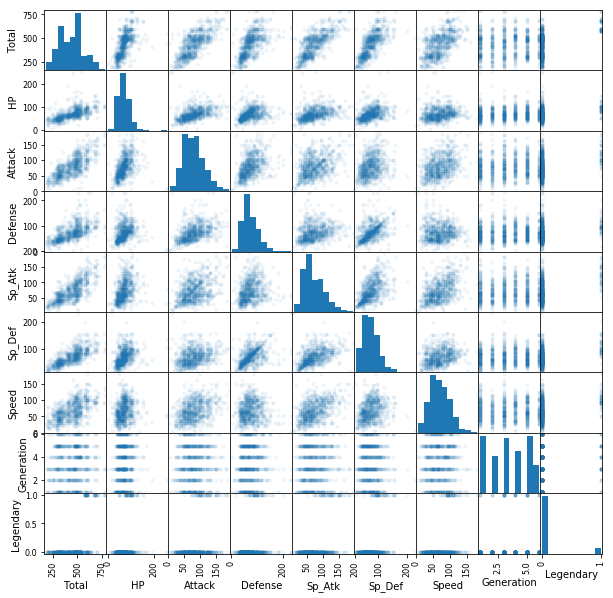

In [9]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [10]:
data.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


##### Зависимость атаки от колличества здоровья покемона:

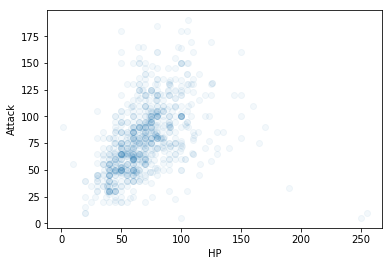

In [11]:
plt.plot(data['HP'], data['Attack'], 'o', alpha = 0.05)
plt.xlabel('HP')
plt.ylabel('Attack')
pass

##### Зависимость эффективности покемона от очереди его атаки:

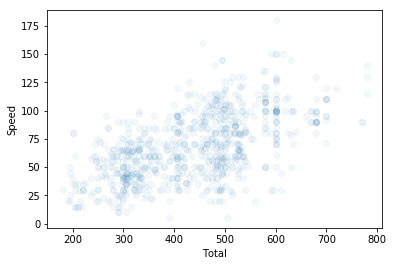

In [12]:
plt.plot(data['Total'], data['Speed'], 'o', alpha = 0.05)
plt.xlabel('Total')
plt.ylabel('Speed')
pass

##### Зависимость суммы всех статистических данных покемона от его уникальности:

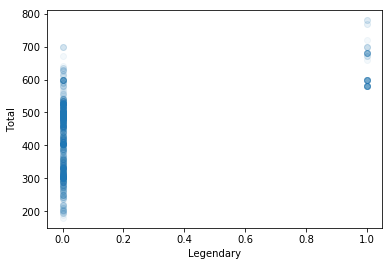

In [13]:
plt.plot(data['Legendary'], data['Total'], 'o', alpha = 0.05)
plt.xlabel('Legendary')
plt.ylabel('Total')
pass

### Подготовка данных:
Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

In [14]:
data.count(axis=0)

Name          800
Type_1        800
Type_2        414
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64

Можно увидеть, что почти для половины покемонов не указан второй признак.

In [15]:
data[data.Type_2.isnull()]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
24,Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False
25,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False


In [16]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [17]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Type_2 является категориальным признаком,  есть два варианта, как поступить с незаполнеными значениями: – заполнение пропущенных значений самым популярным в столбце или удалить этот столбец.

In [18]:
data['Type_2'].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type_2, dtype: object

Самый частый встречающийся Type_2 - это "Летающий", однако добавлять покемонам у которых нет второго типа такую способность неверным шагом, поэтому было решено удалить эту колонку для дальнейших вычислений.

In [19]:
data = data.drop('Type_2', axis=1)

#### А так же уберем имена покемонов:

In [20]:
data = data.drop('Name', axis=1)

In [21]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Выделим категориальные и числовые признаки:

In [27]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']


#### Небинарные признаки
К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак Type_2 принимает 18 различных значений:

In [23]:
data_nonbinary = pd.get_dummies(data['Type_1'])
print(data_nonbinary.columns)

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')


Для удобства сразу заполним выделенный признаквыделенный признак - "Легендарность" покемона (вектор y) :

In [24]:
y = np.array([1 if it == True else 0 for it in data['Legendary']])

In [25]:
data = data.drop('Legendary', axis=1)

### Нормализация количественных признаков
 
 Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [28]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [29]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [30]:
data_numerical.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


### Соединяем все в одну таблицу:

In [34]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)
print (data.columns)

(800, 26)
Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')


In [32]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Bug,Dark,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,0.086250,0.038750,...,0.040000,0.087500,0.040000,0.030000,0.122500,0.035000,0.071250,0.055000,0.033750,0.140000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.280908,0.193119,...,0.196082,0.282743,0.196082,0.170694,0.328068,0.183895,0.257403,0.228123,0.180698,0.347204
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X),  выделенный признак (вектор y) был выделен выше: 

In [35]:
X = data
feature_names = X.columns

In [36]:
type(feature_names)

pandas.indexes.base.Index

In [37]:
feature_names

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [38]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 26)
(800,)


Теперь у нас 26 входных признаков.

### Обучающая и тестовая выборки

Cтроить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой.
В рассматриваемой задаче мы сами разобьем имеющиеся у нас данные на обучающую и тестовую выборки.
Разбиение на тестовую и обучающую выборку должно быть случайным. Обычно используют разбиения в пропорции 50%:50%, 60%:40%, 75%:25% и т.д.

Мы воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%:

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


### KNN  – метод ближайших соседей

Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Количество соседей kk соответствует параметру n_neighbors.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

После обучения модели мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.

In [45]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.05 0.0708333333333


err_train и err_test – это ошибки на обучающей и тестовой выборках. Как мы видим, они составили 0.05% и 0.07%.

#### Подбор параметров

In [46]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0482142857143 25


In [47]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0464285714286 0.0666666666667


с ошибкой 0.06 можно предсказать Легендарный покемон или нет по имеющимся признакам.

### SVC – машина опорных векторов

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.0375 0.0791666666667


На тестовой выборке получили ошибку в 0.079%.

С помощью подбора параметров попробуем ее еще уменьшить.

#### Радиальное ядро
Вначале попробуем найти лучшие значения параметров для радиального ядра.

In [53]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.046428571428571375
best C      =  100.0
best gamma  =  0.01


Получили ошибку перекрестного контроля в 0.04%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [55]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.0125 0.0708333333333


Ошибка на тестовой выборке равна 0.07%. Такой же результат мы получили в knn.

### Logistic Regression

In [59]:
from sklearn import linear_model
lg = linear_model.LogisticRegression()
grid = GridSearchCV(lg, param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.050000000000000044 0.1


In [60]:
lg = linear_model.LogisticRegression(C = best_C).fit(X_train, y_train)
lg_err_train = 1 - lg.score(X_train, y_train)
lg_err_test = 1 - lg.score(X_test, y_test)
print(lg_err_train, lg_err_test)

0.0464285714286 0.075


### Linear Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, (y_train))

C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [62]:
lda_train_predict = lda.predict(X_train)
lda_test_predict = lda.predict(X_test)

lda_err_train = 1 - lda.score(X_train, y_train)
lda_err_test = 1 - lda.score(X_test, y_test) 

print(lda_err_train, lda_err_test)

0.0553571428571 0.104166666667


Тут результаты получились намного хуже.

### Quadratic Discriminant Analysis

In [63]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
reg_param_array = np.arange(0, 1, 0.1)
qda = QuadraticDiscriminantAnalysis()
grid = GridSearchCV(qda, param_grid = {'reg_param': reg_param_array})
grid.fit(X_train, y_train)

best_qda_err = 1 - grid.best_score_
best_reg = grid.best_estimator_.reg_param
print (best_qda_err, best_reg)

0.05535714285714288 0.5


C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site

In [64]:
qda = QuadraticDiscriminantAnalysis(reg_param=best_reg).fit(X_train, y_train)

qda_err_train = 1 - qda.score(X_train, y_train)
qda_err_test = 1 - qda.score(X_test, y_test) 

print(qda_err_train, qda_err_test)

0.0517857142857 0.0666666666667


C:\Users\mary0616\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


А вот тут результат уже лучше, чем у предыдущих.